# Repeated Edited Nearest Neighbours

Extends Edited Nearest neighbours in that it repeats the procedure over an over, until no further observation is removed from the dataset, or alternatively until a maximum number of iterations is reached.

Briefly:

1) Train a KNN algorithm on the entire dataset, and find the 3 closest neighbours (user can decide how many neighbours to examine)

2) Check all observations from majority class and remove observations if its class is different from that of its neighbour

3) Repeat 1 and 2 over the remaining data

This procedure always looks at the same number of neighbours.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RepeatedEditedNearestNeighbours

## Create data

We will create data where the classes have different degrees of separateness.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [2]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

## Repeated Edited Nearest Neighbours

[RepeatedEditedNearestNeighbours](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RepeatedEditedNearestNeighbours.html)


### Well separated classes

In [3]:
# create data

X, y = make_data(sep=2)

# set up repeated edited nearest neighbour

renn = RepeatedEditedNearestNeighbours(
    sampling_strategy='auto',# removes only the majority class
    n_neighbors=3, # the number of neighbours to examine
    kind_sel='all', # all neighbouring observations should show the same class
    n_jobs=4, # 4 processors in my laptop
    max_iter=100) # maximum number of iterations

X_resampled, y_resampled = renn.fit_resample(X, y)

In [4]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((967, 2), (967,))

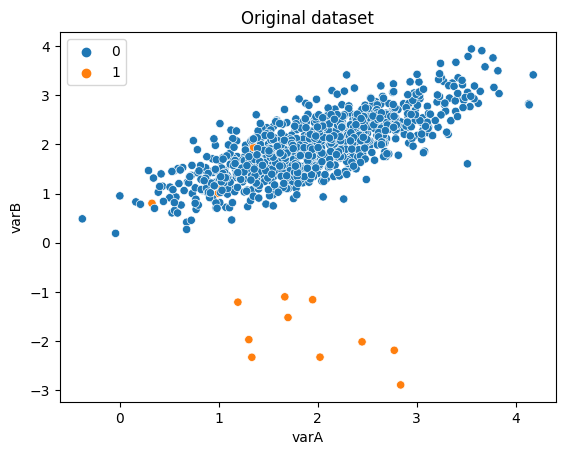

In [6]:
# plot original data

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

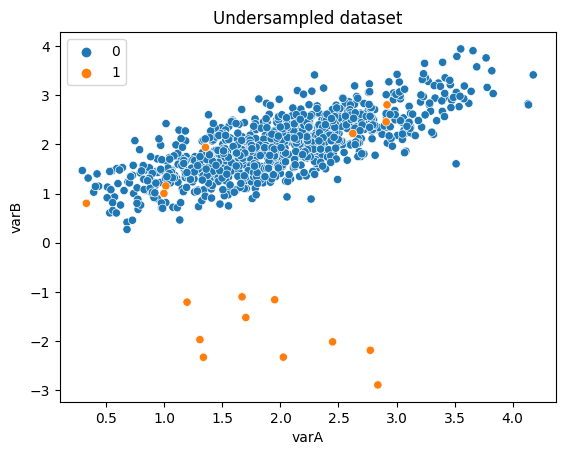

In [7]:
# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

Note how some yellow dots can now be seen clearer, as their neighbouring observations from the other class were removed from the data set.

In [8]:
# the number of iterations that were actually
# run, if less than max_iter, it means that the 
# procedure stopped earlier.

renn.n_iter_

4

We see that only 4 iterations were run.


In [9]:
# let's examine the resampled target

y_resampled.value_counts()

0    950
1     17
dtype: int64

### Partially separated classes

Let's repeat the same exercise in data where the classes are not so clearly separated. 

In [9]:
# create data
X, y = make_data(sep=0)

# set up repeated edited nearest neighbour transformer

renn = RepeatedEditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3, # the number of neighbours to examine
    kind_sel='all',
    n_jobs=4,
    max_iter=100) # maximum number of iterations

X_resampled, y_resampled = renn.fit_resample(X, y)

In [10]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# undersampled data

X_resampled.shape, y_resampled.shape

((940, 2), (940,))

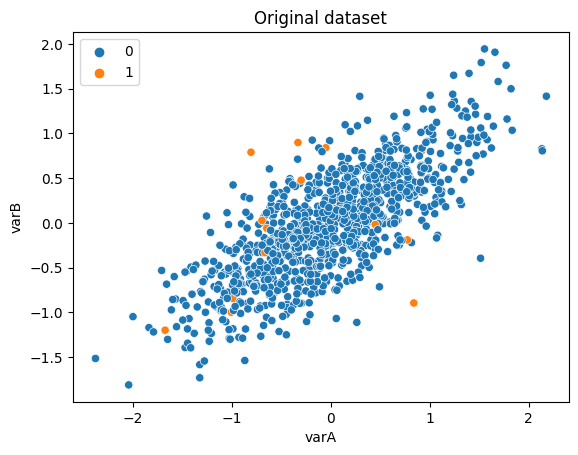

In [12]:
# plot original data

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

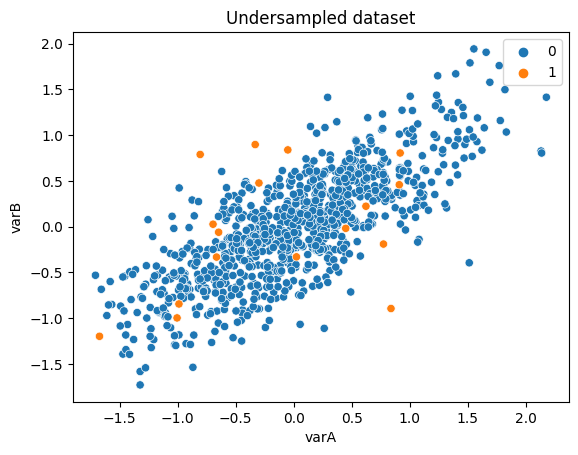

In [13]:
# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset') 
plt.show()